# Analysis: Observed Trends
### 1. As of 2/28/2018, the max temperatures of cities below the equator tend to be warmer than cities above the equator, and the max temperture for cities above the equator drops as the distance between the equator increases 
### 2. As of 2/28/2018, more cities above the equator had wind speeds higher than 10mph than cities below the equator. 
### 3. As of 2/28/2018, there is no observable trend between latitude and cloudiness

In [1]:
# Dependencies
from citipy import citipy
import random

import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np

In [2]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Setting latitude and longitude (random)
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build partial query URL
query_url = url + "appid=" + api_key + "&q="

In [3]:
# Generate random cities list
cities = []

#for lat, lng in zip(lat, lng):
   # print(lat,lang)
    #cities.append(citipy.nearest_city(lat,lang).city_name)
    
for lat, lng in zip(lat, lng):
    city = citipy.nearest_city(lat, lng)
    city = city.city_name
    
    if city not in cities:
        cities.append(city)

In [4]:
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number, city name, and requested URL.

#Perform API Calls
city_weather = []
row_count = 1
for city in cities:
    print(f"City #{row_count} || City: {city}")
    row_count += 1
    url = query_url+city
    print(url)
    city_info = req.get(query_url+city)
    print(" ")
    
    try: 
        city_info_json = city_info.json()
        city_cloudiness = city_info_json["clouds"]["all"]
        country = city_info_json["sys"]["country"]
        city_date = city_info_json["dt"]
        city_humidity = city_info_json["main"]["humidity"]
        city_lat = city_info_json["coord"]["lat"]
        city_lng = city_info_json["coord"]["lon"]
        city_max_temp = city_info_json["main"]["temp_max"]
        city_wind_speed = city_info_json["wind"]["speed"]
        
        # Append the list to a single dictionary for each parameter 
        city_weather.append({"City": city, 
                          "Cloudiness": city_cloudiness, 
                          "Country": country, 
                          "Date": city_date, 
                          "Humidity": city_humidity, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                            # converting Kelvin to Fahrenheit
                          "Max Temp": (city_max_temp * 9/5 - 459.67), 
                          "Wind Speed": city_wind_speed})
        
    except KeyError:
        print("City not found. Skipping...")
        print(" ")

City #1 || City: ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ust-kuyga
 
City #2 || City: albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany
 
City #3 || City: narsaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=narsaq
 
City #4 || City: aykhal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aykhal
 
City #5 || City: ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
 
City #6 || City: mataura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mataura
 
City #7 || City: port hardy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port hardy
 
City #8 || City: paamiut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=paamiut
 
City #9 || C

 
City #64 || City: nome
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nome
 
City #65 || City: samusu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=samusu
 
City not found. Skipping...
 
City #66 || City: pryazha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pryazha
 
City #67 || City: maldonado
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maldonado
 
City #68 || City: georgetown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=georgetown
 
City #69 || City: rocha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rocha
 
City #70 || City: yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yellowknife
 
City #71 || City: mercedes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f

 
City #127 || City: vostok
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vostok
 
City #128 || City: mount isa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mount isa
 
City #129 || City: bur gabo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bur gabo
 
City not found. Skipping...
 
City #130 || City: yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yarmouth
 
City #131 || City: victoria
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=victoria
 
City #132 || City: itaueira
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=itaueira
 
City #133 || City: kaman
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kaman
 
City #134 || City: la ronge
http://api.openweathermap.org/data/2.5/weather?appid=25bc90

 
City #189 || City: santiago
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santiago
 
City #190 || City: clyde river
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=clyde river
 
City #191 || City: alvaraes
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alvaraes
 
City #192 || City: bilibino
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilibino
 
City #193 || City: margate
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=margate
 
City #194 || City: novyy urgal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=novyy urgal
 
City #195 || City: cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabedelo
 
City #196 || City: svetlaya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

 
City #251 || City: dzhubga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dzhubga
 
City #252 || City: barbar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barbar
 
City not found. Skipping...
 
City #253 || City: tottori
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tottori
 
City #254 || City: senno
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=senno
 
City #255 || City: pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pevek
 
City #256 || City: pingliang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pingliang
 
City #257 || City: bacalar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bacalar
 
City #258 || City: san jose
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153e

 
City #314 || City: hami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hami
 
City #315 || City: jalalabad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jalalabad
 
City #316 || City: saleaula
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saleaula
 
City not found. Skipping...
 
City #317 || City: podgorenskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=podgorenskiy
 
City #318 || City: la grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=la grande
 
City #319 || City: korla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=korla
 
City not found. Skipping...
 
City #320 || City: kailua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kailua
 
City #321 || City: laguna
http://api.openweathermap.org

 
City #378 || City: alugan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alugan
 
City #379 || City: ixtepec
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ixtepec
 
City #380 || City: trairi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=trairi
 
City #381 || City: neryungri
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=neryungri
 
City #382 || City: shelburne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shelburne
 
City #383 || City: sinkat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinkat
 
City not found. Skipping...
 
City #384 || City: wajir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wajir
 
City #385 || City: broken hill
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196

 
City #442 || City: north bend
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=north bend
 
City #443 || City: kroya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kroya
 
City #444 || City: newport
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=newport
 
City #445 || City: pangody
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pangody
 
City #446 || City: fevralsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=fevralsk
 
City not found. Skipping...
 
City #447 || City: bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bandarbeyla
 
City #448 || City: biltine
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=biltine
 
City #449 || City: sibolga
http://api.openweathermap.org/data/2.5/weather?appid=2

 
City #505 || City: ijaki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ijaki
 
City not found. Skipping...
 
City #506 || City: prado
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=prado
 
City #507 || City: sarlat-la-caneda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sarlat-la-caneda
 
City #508 || City: lahij
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lahij
 
City #509 || City: artyom
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=artyom
 
City #510 || City: ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ilulissat
 
City #511 || City: myanaung
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=myanaung
 
City #512 || City: picos
http://api.openweathermap.org/data/2.5/weather?appid=25bc9

 
City not found. Skipping...
 
City #569 || City: san vicente de canete
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san vicente de canete
 
City #570 || City: strichen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=strichen
 
City #571 || City: lebu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lebu
 
City #572 || City: roma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=roma
 
City #573 || City: alofi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alofi
 
City #574 || City: tshikapa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tshikapa
 
City #575 || City: serenje
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=serenje
 
City #576 || City: belaya gora
http://api.openweathermap.org/data/2.5/weather

In [5]:
# Weather info dataframe
city_weather_pd = pd.DataFrame(city_weather)
city_weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ust-kuyga,20,RU,1523320169,81,70.00,135.55,3.6932,1.87
1,albany,90,US,1523318040,32,42.65,-73.75,39.2000,1.50
2,narsaq,44,GL,1523317800,36,60.91,-46.05,30.2000,8.70
3,aykhal,44,RU,1523320171,80,65.95,111.51,5.2232,1.77
4,ushuaia,75,AR,1523318400,87,-54.81,-68.31,44.6000,1.50


In [6]:
city_weather_pd.to_csv('WeatherData.csv')

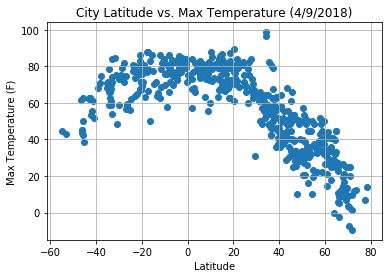

In [15]:
# Temperature (F) vs. Latitude Scatterplot
plt.scatter(city_weather_pd["Lat"], city_weather_pd["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature (4/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("lat_vs_maxtemp.png") 

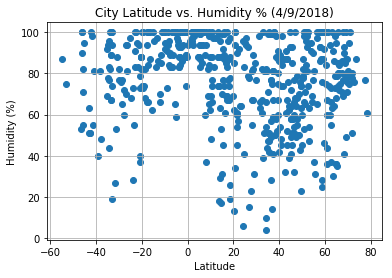

In [14]:
# Humidity (%) vs. Latitude
plt.scatter(city_weather_pd["Lat"], city_weather_pd["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity % (4/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("lat_vs_humidity.png")

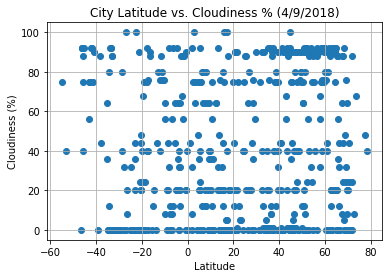

In [11]:
# Cloudiness (%) vs. Latitude
plt.scatter(city_weather_pd["Lat"], city_weather_pd["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness % (4/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("lat_vs_cloudiness.png")

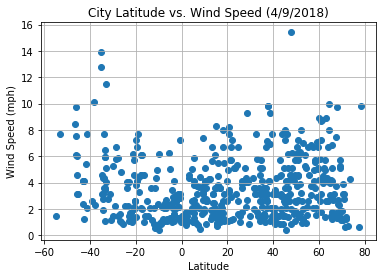

In [13]:
# Wind Speed (mph) vs. Latitude
plt.scatter(city_weather_pd["Lat"], city_weather_pd["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed (4/9/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.savefig("lat_vs_windspeed.png")